# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### load dataset

In [2]:
df=pd.read_csv('drug200.csv')

In [3]:
df.head() # show some first rows of data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.tail() # Show last rows of data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


**Observation**
- There is total **6** Columns
- **4** categorical variables
- **2** continous variable


### checking the missing value in data set

In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

**Observation**
- there is no null value in dataset

In [7]:
df.shape # check the size of datd

(200, 6)

**Observation**
- there is 200 Rows and 6 columns in dataset

# Lets Do Some EDA

<AxesSubplot:xlabel='Sex', ylabel='count'>

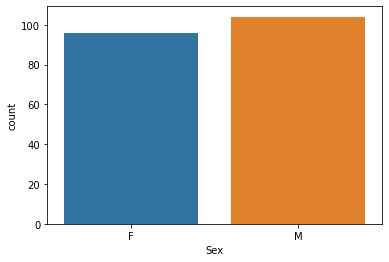

In [8]:
sns.countplot(data=df,x=df.Sex)

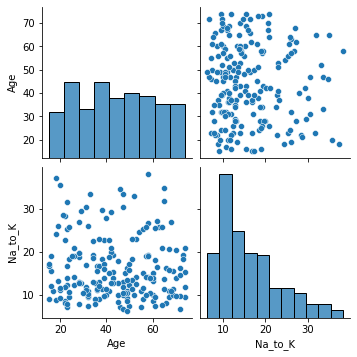

In [56]:
sns.pairplot(df)

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

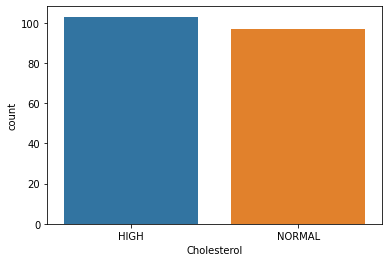

In [55]:
sns.countplot(data=df,x=df.Cholesterol)

<AxesSubplot:xlabel='Drug', ylabel='count'>

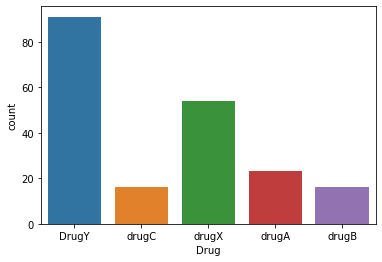

In [21]:
sns.countplot(data=df,x=df.Drug)

<AxesSubplot:xlabel='BP', ylabel='count'>

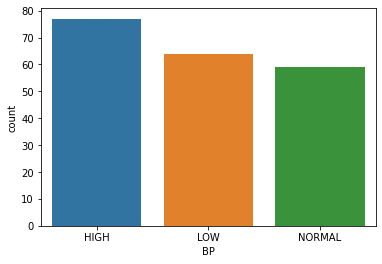

In [24]:
sns.countplot(data=df,x=df.BP)

<AxesSubplot:xlabel='Age', ylabel='Count'>

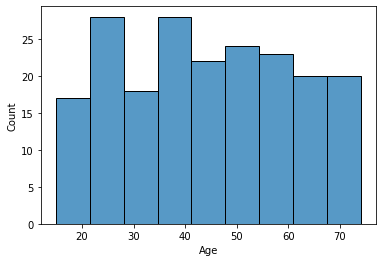

In [29]:
sns.histplot(data=df,x=df.Age)

ValueError: could not convert string to float: 'F'

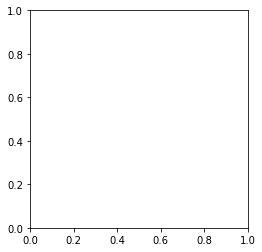